# Proyek Analisis Data: Bike Sharing Dataset

*   **Nama**: Auliya Rahman
*   **ML-09**
*   **m269b4ky0732**



## Menentukan Pertanyaan Bisnis


*   Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?
*   Bagaimana pengaruh variabel holiday, weekday, dan workingday terhadap jumlah penyewa sepeda?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Data Wrangling



###Gathering Data

In [2]:
day_df = pd.read_csv ('/content/drive/My Drive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###Assessing Data

Menilai Data day_df

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df. Untuk tipe data dapat dilihat pada kolom paling kanan, yaitu Dtype. Selain itu, dapat dilihat bahwa seluruh data memiliki 731 non-null, artinya tidak terdapat missing value.

Data di atas merupakan ringkasan parameter statistik

###Cleaning Data

Cek Missing Values

In [4]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


dari output di atas, terlihat bahwa tidak terdapat missing values.

Cek Data Duplikat

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
# mengubah data cuaca 1,2,3,4
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'cerah berawan',
    2: 'berawan',
    3: 'hujan',
    4: 'cuaca ekstrem'
})

# mengubah data holiday 0,1
day_df['holiday'] = day_df['holiday'].map({
    0: 'bukan hari libur',
    1: 'hari libur'
})

# mengubah data weekday 0,1,2,3,4,5,6
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
})

# mengubah data workingday 0,1
day_df['workingday'] = day_df['workingday'].map({
    0: 'bukan hari kerja',
    1: 'hari kerja'
})

## Exploratory Data Analysis (EDA)

###Eksplorasi day_df

In [7]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,bukan hari libur,Sabtu,hari kerja,cerah berawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Data di atas merupakan rangkuman parameter statistik.

**Mengelompokan penyewa sepeda (casual, registered, cnt) berdasarkan cuaca**

In [8]:
day_df.groupby(by='weathersit').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'cnt': ['max', 'min', 'mean', 'sum']
})

casual                         registered                    \
                 max min        mean     sum        max  min         mean   
weathersit                                                                  
berawan         3155   9  687.352227  169776       6844  491  3348.510121   
cerah berawan   3410  15  964.030238  446346       6946  416  3912.755940   
hujan           1264   2  185.476190    3895       4324   20  1617.809524   

                         cnt                             
                   sum   max  min         mean      sum  
weathersit                                               
berawan         827082  8362  605  4035.862348   996858  
cerah berawan  1811606  8714  431  4876.786177  2257952  
hujan            33974  4639   22  1803.285714    37869

**Mengelompokan penyewa sepeda (casual, registered, cnt) berdasarkan hari libur (holiday)**

In [9]:
day_df.groupby(by='holiday').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'cnt': ['max', 'min', 'mean','sum']
})

casual                           registered       \
                    max  min         mean     sum        max  min   
holiday                                                             
bukan hari libur   3410    2   841.771831  597658       6946   20   
hari libur         3065  117  1064.714286   22359       5172  573   

                                         cnt                              
                         mean      sum   max   min         mean      sum  
holiday                                                                   
bukan hari libur  3685.332394  2616586  8714    22  4527.104225  3214244  
hari libur        2670.285714    56076  7403  1000  3735.000000    78435

**Mengelompokan penyewa sepeda (casual, registered, cnt) berdasarkan hari dalam seminggu (weekday)**

In [10]:
day_df.groupby(by='weekday').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'cnt': ['max', 'min', 'mean','sum']
})

casual                          registered                             \
           max min         mean     sum        max   min         mean     sum   
weekday                                                                         
Jumat     2469  38   752.288462   78238       6917  1129  3938.000000  409552   
Kamis     1405  15   590.961538   61460       6781   416  4076.298077  423935   
Minggu    3283  54  1338.295238  140521       5657   451  2890.533333  303506   
Rabu      2562   9   551.144231   57319       6946   432  3997.394231  415729   
Sabtu     3410  57  1465.257143  153852       5966   570  3085.285714  323955   
Selasa    1348   9   556.182692   57843       6697   573  3954.480769  411266   
Senin     3065   2   674.133333   70784       6435    20  3663.990476  384719   

          cnt                             
          max   min         mean     sum  
weekday                                   
Jumat    8362  1167  4690.288462  487790  
Kamis    7804   431  4667.259615  485395  
Minggu   8227   605  4228.828571  444027  
Rabu     8173   441  4548.538462  473048  
Sabtu    8714   627  4550.542857  477807  
Selasa   7767   683  4510.663462  469109  
Senin    7525    22  4338.123810  455503

**Mengelompokan penyewa sepeda (casual, registered, cnt) berdasarkan hari kerja (workingday)**

In [11]:
day_df.groupby(by='workingday').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'cnt': ['max', 'min', 'mean','sum']
})

casual                          registered                    \
                    max min         mean     sum        max  min         mean   
workingday                                                                      
bukan hari kerja   3410  54  1371.134199  316732       5966  451  2959.034632   
hari kerja         2469   2   606.570000  303285       6946   20  3978.250000   

                            cnt                             
                      sum   max  min         mean      sum  
workingday                                                  
bukan hari kerja   683537  8714  605  4330.168831  1000269  
hari kerja        1989125  8362   22  4584.820000  2292410

## Visualization & Explanatory Analysis

###Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

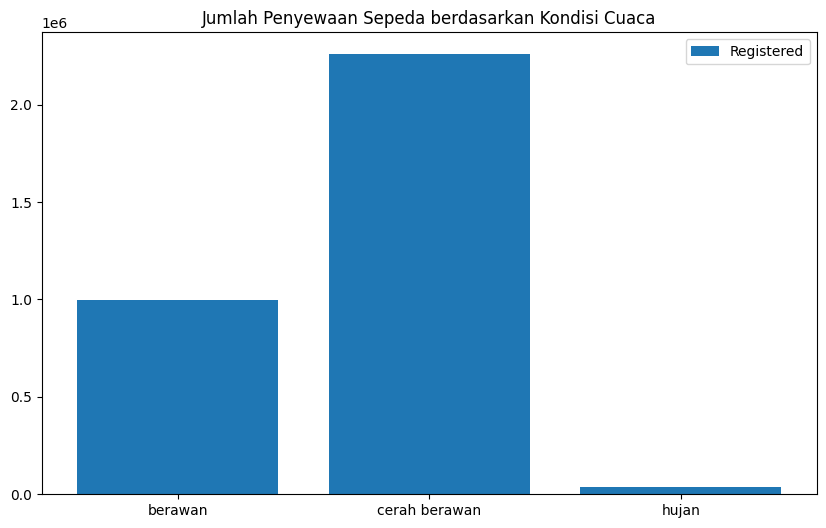

In [12]:
# Mengelompokkan data berdasarkan cuaca dan menghitung jumlah penyewaan casual dan registered
weather_usage = day_df.groupby('weathersit')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat barplot
plt.bar(
    weather_usage['weathersit'],
    weather_usage['cnt'],
    label='Registered',
    color='tab:blue'
)

# Menambahkan label dan judul
plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.legend()

# Tampilkan plot
plt.show()

Berdasarkan hasil analisis barplot, dapat disimpulkan bahwa jumlah penyewaan sepeda terbanyak ada pada hari cerah berawan dengan total lebih dari dua juta, diikuti oleh cuaca berawan dengan total penyewaan kurang dari 1 juta dan cuaca hujan dengan total penyewaan di bawah 500 ribu.

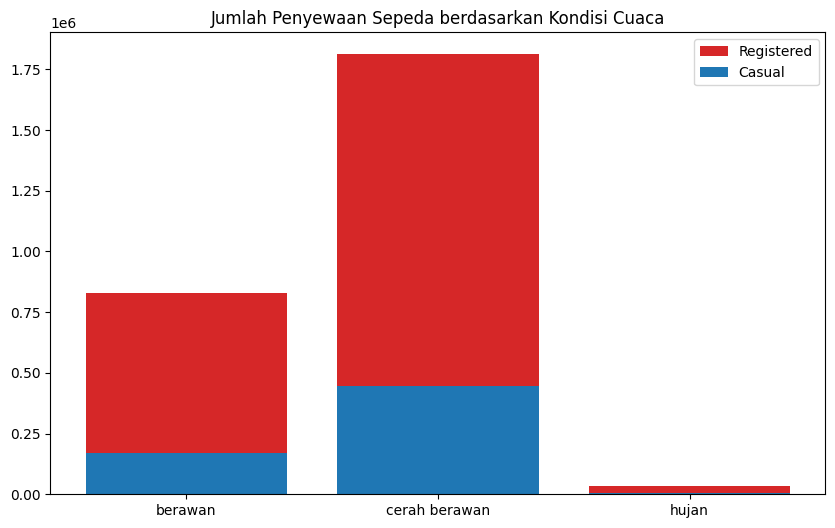

In [13]:
# Mengelompokkan data berdasarkan cuaca dan menghitung jumlah penyewaan casual dan registered
weather_usage = day_df.groupby('weathersit')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat barplot
plt.bar(
    weather_usage['weathersit'],
    weather_usage['registered'],
    label='Registered',
    color='tab:red'
)

plt.bar(
    weather_usage['weathersit'],
    weather_usage['casual'],
    label='Casual',
    color='tab:blue'
)

# Menambahkan label dan judul
plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.legend()

# Tampilkan plot
plt.show()


Barplot di atas merupakan hasil analisis jumlah penyewaan sepeda berdasarkan kategori registered dan casual. Dapat dilihat, bahwa, sesuai dengan barplot cnt sebelumnya, jumlah penyewaan terbanyak ada di cuaca cerah berawan. Dapat dilihat juga, bahwa dari seluruh total penyewaan sepeda, jumlah penyewaan sepeda casual lebih sedikit dibandingkan jumlah penyewaan sepeda registered.

###Bagaimana pengaruh variabel holiday, weekday, dan workingday terhadap jumlah penyewa sepeda?

Text(0.5, 1.0, 'Jumlah Penyewaan Workingday')

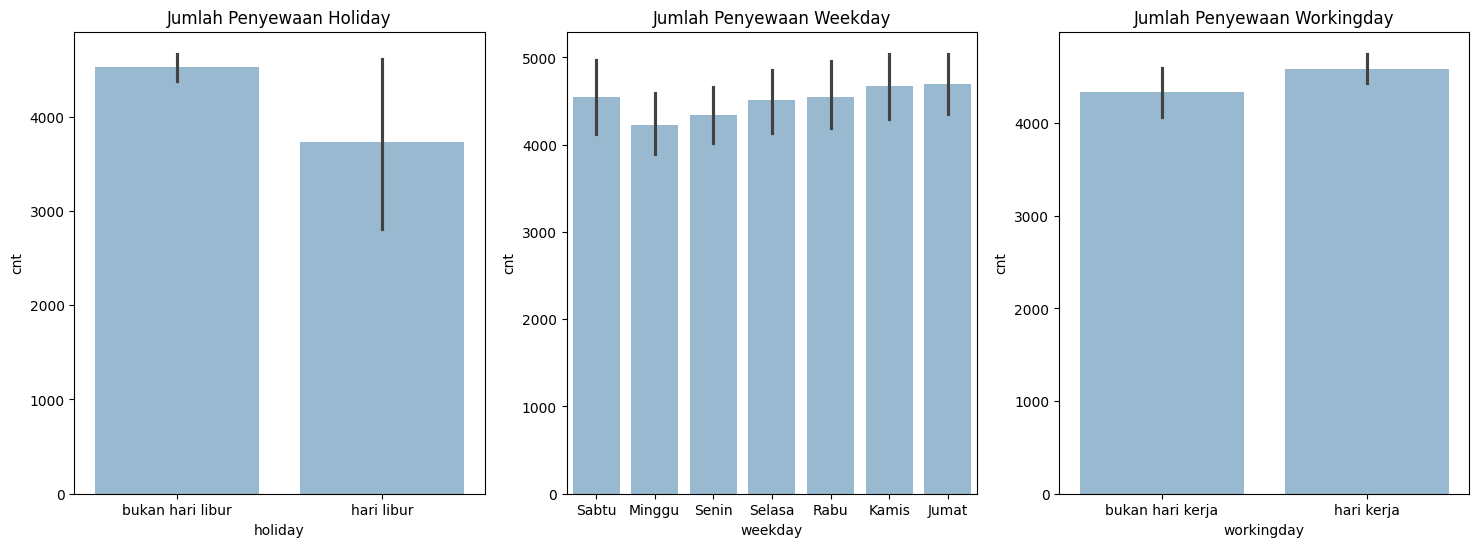

In [14]:
plt.figure(figsize=(18, 6))

# Bar plot untuk holiday
plt.subplot(1, 3, 1)
sns.barplot(
    x='holiday',
    y='cnt',
    data=day_df,
    alpha=0.5
)
plt.title('Jumlah Penyewaan Holiday')

# Bar plot untuk weekday
plt.subplot(1, 3, 2)
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df,
    alpha=0.5
)
plt.title('Jumlah Penyewaan Weekday')

# Bar plot untuk workingday
plt.subplot(1, 3, 3)
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    alpha=0.5
)
plt.title('Jumlah Penyewaan Workingday')

Berdasarkan hasil analisis barplot di atas:


*   Pada holiday, jumlah penyewaan sepeda terbanyak ada pada hari yang bukan merupakan hari libur (bukan holiday)
*   Pada weekday, jumlah penyewaan terbanyak ada di hari jumat
*   Pada workingday, jumlah penyewaan sepeda terbanyak ada pada hari kerja (workingday).


##Kesimpulan


**Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?**

Berdasarkan hasil analisisnya, didapatkan kesimpulan bahwa jumlah penyewaan sepeda terbanyak ada pada cuaca cerah berawan. Hal ini dapat terjadi, kemungkinan dikarenakan pada cuaca hujan, lintasan/jalan akan sangat licin, ditambah dengan kencangnya angin menyebabkan sulitnya bersepeda pada cuaca tersebut. Selain itu, ketika cuaca berawan, ada kemungkinan besar akan terjadi hujan, itulah mengapa jumlah penyewaan sepeda pada kedua cuaca ini jauh lebih sedikit dibandingkan pada cuaca cerah berawan.

**Bagaimana pengaruh variabel holiday, weekday, dan workingday terhadap jumlah penyewa sepeda?**


Pada hari kerja atau bukan hari libur, banyak orang menggunakan sepeda sebagai alat transportasi untuk pergi ke tempat kerja, sekolah, atau tujuan lainnya. Inilah yang menyebabkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan hari yang bukan hari kerja atau hari libur. Selain itu, hari Jumat sering dianggap sebagai awal akhir pekan. Banyak orang mungkin menyewa sepeda untuk bersenang-senang atau berolahraga setelah minggu kerja yang panjang. Ini bisa menjelaskan mengapa penyewaan sepeda pada hari tersebut lebih tinggi dibandingkan hari lainnya.





In [15]:
day_df.to_csv("day.csv", index=False)